<p>
<font size='5' face='Georgia, Arial'>IIC2115 - Programación como herramienta para la ingeniería</font><br>
</p>

# Herramientas para Python

En continuación a la clase pasada, continuaremos introduciendo herramientas que pueden ser utilizadas en Python. En este capítulo trabajermos con archivos geográficos (GIS) y cómo podemos manejarlos mediante librerías de Python.

## 1.- GIS (SIG en español)

Un Sistema de Información Geográfica (SIG o GIS) es una integración organizada de hardware, software y datos geográficos diseñada para capturar, almacenar, manipular, analizar y desplegar en todas sus formas la información geográficamente referenciada con el fin de resolver problemas complejos de planificación y gestión.

### 1.1- Funcionamiento de GIS

El GIS funciona como una base de datos con información geográfica (datos alfanuméricos) que se encuentra asociada por un identificador común a los objetos gráficos de un mapa digital. De esta forma, señalando un objeto se conocen sus atributos e, inversamente, preguntando por un registro de la base de datos se puede saber su localización en la cartografía.

La razón fundamental para utilizar un GIS es la gestión de información espacial. El sistema permite separar la información en diferentes capas temáticas y las almacena independientemente, permitiendo trabajar con ellas de manera rápida y sencilla, y facilitando al profesional la posibilidad de relacionar la información existente a través de la topología de los objetos, con el fin de generar otra nueva que no podríamos obtener de otra forma.

### 1.2.- La representación de los datos

Los datos GIS representan los objetos del mundo real en un sistema referenciado de coordenadas. Para los alcances del curso es necesario entender que uno de los formatos más utilizados para almacenar esta información es el formato Shape File. 

Este formato de archivo, formalmente conocido como ESRI Shapefile (SHP) es propietario de datos espaciales desarrollado por la compañía ESRI, quien crea y comercializa software para Sistemas de Información Geográfica como Arc/Info o ArcGIS. Originalmente se creó para la utilización con su producto ArcView GIS, pero actualmente se ha convertido en formato estándar de facto para el intercambio de información geográfica entre Sistemas de Información Geográfica por la importancia que los productos ESRI tienen en el mercado SIG y por estar muy bien documentado. 

Dentro de estos archivos podemos encontrar tres tipos de representaciones:

* Puntos
* Líneas
* Polígonos

Dentro de un mismo archivo SHP no pueden existir estas formas combinadas. Es decir, tendremos Shapes especficamente compuestos por puntos, líneas o bien por polígonos. Por ejemplo si tuvieramos un archivo de los colegios de Santiago, este podría ser un shape de puntos (si buscamos representarlos de forma puntual) o polígonos (si buscamos mayor detalle y conocer la forma de cada colegio en el plano). 

Es importante mencionar que una fuente de datos SHP está compuesta de una serie de archivos a parte del ".shp". También encontramos ".shx", ".dbf", ".prj" u otros. Lo importante, es que estos archivos se encuentren en la misma carpeta que el archivo ".shp" y posean el mismo nombre. Si le interesa saber para que sirve cada uno de estos archivos los invito a documentarse en la red.

### 1.3.- GeoPandas

El manejo de este tipo de información por medio de Python se llevará a cabo gracias a la librería `GeoPandas`. Una librería basada en el trabajo con DataFrames (Como en Pandas), pero que esta vez se incluirá una columna geográfica para representar: Puntos, Líneas o Polígonos. Recordemos que un DataFrame (o shapefile) debe contar solo con un tipo de información. Por lo que si buscamos representar más de un tipo de datos, debemos crear un DataFrame por cada forma geográfica. 

## 2.- Instalación de GeoPandas (IMPORTANTE)

### 2.1.- Conociendo la versión de python

El proceso de instalación de GeoPandas puede volverse complejo si no se siguen correctamente los pasos para llevar a cabo la instalación. Su instalación se llevará acabo mediante `conda install` si es que tienen anaconda instalado o mediante `pip install` de no ser así.

Lo primero de todo es saber que version de python tenemos instalada en nuestro computador para ello abrimos el CMD o TERMINAL y ejecutamos

`py --version` o `python --version`

Ahi nos indicará la version de python que tenemos instalada por defecto.

### 2.2.- Instalando GeoPandas

#### 2.2.1.- Si ya poseen Anaconda instalado

Para los que ya instalaron Anaconda en sus computadores basta con ejecutar el siguiente comando en el CMD o en el Terminal.

`conda install -c conda-forge geopandas`

Una vez ejecutado, GeoPandas ya se encuentra funcionando en la versión que verificamos inicialmente por lo que ya podríamos usar el comando:

In [ ]:
import geopandas as gpd

Si es que la consola nos indica que no conoce el comando `conda`, entonces deben seguir los pasos indicado en este [link](https://stackoverflow.com/questions/44597662/conda-command-is-not-recognized-on-windows-10)

#### 2.2.1.- Si no cuentan con Anaconda (windows)

En este caso se deben instalar manualmente todas las dependecias de GeoPandas antes de ser instalado. Esta librería depende de las siguientes librerías:

* numpy
* pandas (version 0.15.2 or later)
* shapely
* fiona
* six
* pyproj

Para ello vamos a seguir paso a paso las indicaciones que se entregan en el siguiente [link](https://geoffboeing.com/2014/09/using-geopandas-windows/), bajo el título "Installing geopandas and its dependencies manually"

*Si la consola no les reconoce `pip install` pueden corregirlo con el siguiente [link](https://stackoverflow.com/questions/23708898/pip-is-not-recognized-as-an-internal-or-external-command)

#### 2.2.1.- Si no cuentan con Anaconda (macOS)

En este caso basta con ejecutar `pip3 install geopandas` en el terminal y debería habilitarse para la verisón de python que verificamos anteriormente.

## 3.- Uso básico de GeoPandas

### 3.1.- Lectura de archivos (.shp)

Lo primero que debemos hacer para trabajar con archivo geográficos es importar la librería de geopandas y luego leer un archivo .shp. Para eso utilizaremos la siguiente función. 

In [8]:
import geopandas as gpd

distritos = gpd.read_file('ejemplos/Distritos Censales/Distritos Censales RM.shp')
lineas_metro = gpd.read_file('ejemplos/Metro 2020/Lineas_2020/Lineas_2020.shp')

En las dos líneas anteriores hemos leído dos archivos shp diferentes. Uno de polígonos con los distritos censales de Santiago y otro de líneas con las líneas de Metro.

#### 3.1.1.- Proyecciones

Las proyección corresponde al sistema de coordenadas utilizado por el shape. Esto permite conocer la magnitud de las coordenadas. Para saber la proyección utilizada en un archivo en particular se debe consultar el parametro `crs` de un DataFrame.

In [9]:
distritos.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - S hemisphere - 72°W to 66°W - by country
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
lineas_metro.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - S hemisphere - 72°W to 66°W - by country
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
lineas_metro.head(1)

,OBJECTID,ID_LINEA,LINEA,LENGTH,Shape_Leng,Shape_Le_1,geometry
0,3,2,L2,18315.942,20087.016072,1301.975352,"LINESTRING (345717.366 6289105.444, 345558.641..."


In [12]:
lineas_metro = lineas_metro.to_crs(4326)

In [13]:
lineas_metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
lineas_metro.head(1)

,OBJECTID,ID_LINEA,LINEA,LENGTH,Shape_Leng,Shape_Le_1,geometry
0,3,2,L2,18315.942,20087.016072,1301.975352,"LINESTRING (-70.66142 -33.52651, -70.66325 -33..."


### 3.2.- Visualización del dataframe

Para visualizar las tablas de información (DataFrames), podemos utilizar lo mismos métodos y funciones aprendidos en Pandas. En este caso, usaremos `head()`.

In [15]:
distritos.head(2)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6..."


In [24]:
distritos['1_UF_M2'].describe()

count    449.000000
mean       5.048530
std        5.664918
min        0.000000
25%        0.790000
50%        4.220000
75%        6.230000
max       41.130000
Name: 1_UF_M2, dtype: float64

In [16]:
lineas_metro.head(2)

,OBJECTID,ID_LINEA,LINEA,LENGTH,Shape_Leng,Shape_Le_1,geometry
0,3,2,L2,18315.942,20087.016072,1301.975352,"LINESTRING (-70.66142 -33.52651, -70.66325 -33..."
1,4,2,L2,18315.942,20087.016072,1057.384032,"LINESTRING (-70.65881 -33.51723, -70.66138 -33..."


Si nos damos cuenta, ambas visualizaciones son identicas a las vistas en los DataFrames de Pandas. La gran diferencia es que en geopandas, estas se llaman GeoDataFrames y poseen una columna extra, donde por defecto poseen una columna llamada 'geometry'. En esta columna se almacena la geometría y puede ser de puntos, líneas o polígonos.

### 3.3.- Visualización gráfica del dataframe

Para visualizar las geometrías antes descritas, utilizaremos el comando `plot()`

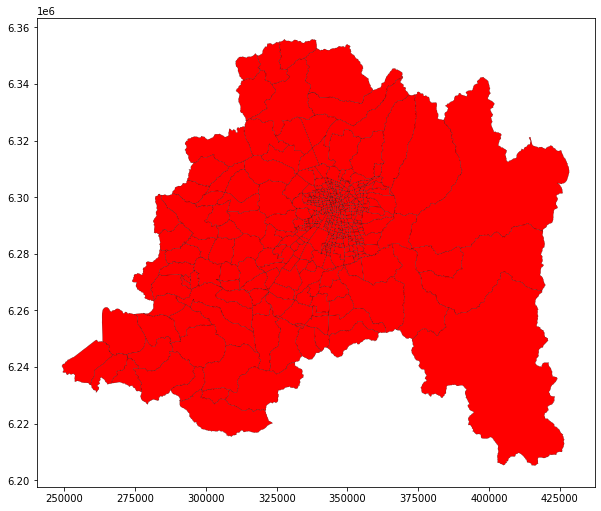

In [21]:
distritos.plot(figsize = (10,10), color = 'red', edgecolor = 'black', linewidth = 0.2)

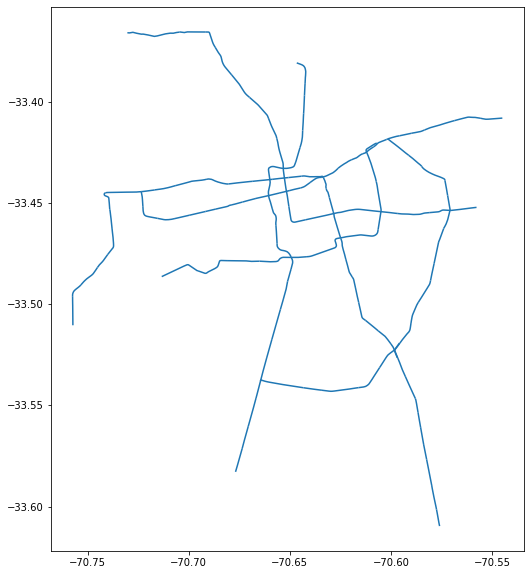

In [22]:
lineas_metro.plot(figsize = (10,10))

Si para el caso de los distritos, deseamos graficar en base a algun dato. Por ejemplo el valor del suelo en los distintos distritos censales, lo indicamos en la función `plot()`

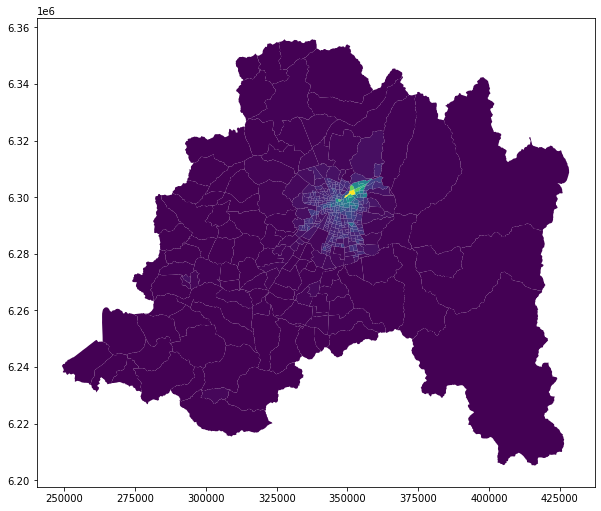

In [23]:
distritos.plot(column = '1_UF_M2', figsize = (10,10))

Podemos utilizar la función `loc[]` de pandas y hacer un pequeño filtro. Asi ver de mejor forma lo que queremos.

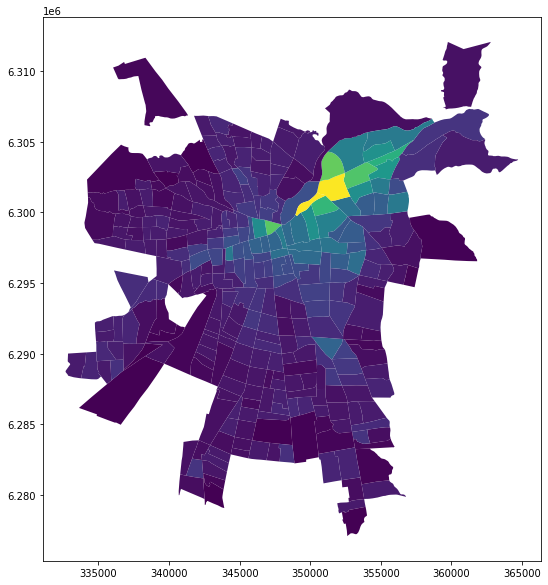

In [27]:
distritosFiltrado = distritos.loc[distritos['1_UF_M2'] > 2]
distritosFiltrado.plot(column = '1_UF_M2', figsize = (10,10))

¿Qué pasa si queremos visualizar las líneas de metro en este mismo gráfico?

In [34]:
lineas_metro = lineas_metro.to_crs(32719)

In [35]:
lineas_metro.head(1)

,OBJECTID,ID_LINEA,LINEA,LENGTH,Shape_Leng,Shape_Le_1,geometry
0,3,2,L2,18315.942,20087.016072,1301.975352,"LINESTRING (345717.366 6289105.444, 345558.641..."


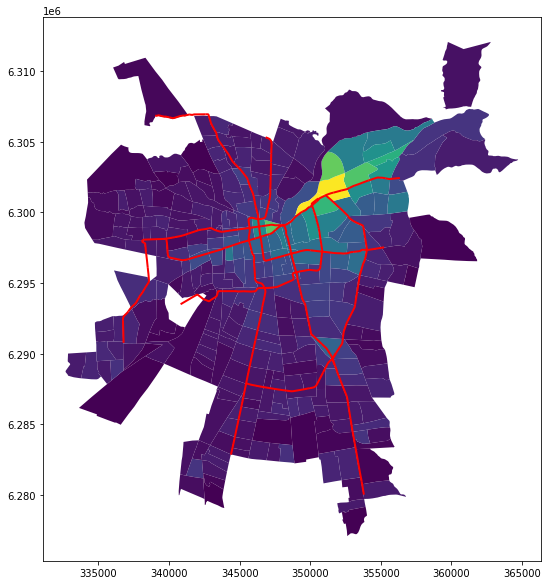

In [36]:
# Guardamos el grafico en una axes
ax = distritosFiltrado.plot(column = '1_UF_M2', figsize = (10,10))

# ploteamos las lineas de metro en las axes guardadas.
lineas_metro.plot(ax = ax, figsize = (10,10), color = 'red', linewidth = 2)

### 3.4.- Funciones geométricas

Geopandas cuenta con una serie de funciones geometricas. Estas se encuentran disponibles en su documentación. A modo de ejemplo vamos a determinar los centroídes de cada distrito censal. Ahi tendremos un shape de puntos

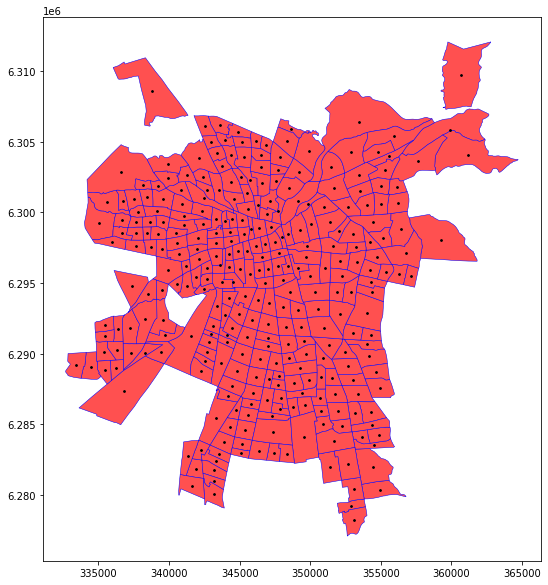

In [37]:
#from copy import deepcopy

# copiamos el dataframe
centroidesDC = distritosFiltrado.copy()

# editamos la geometria por el centroide de las figuras.
centroidesDC['geometry'] = centroidesDC.centroid

# Graficamos
ax = distritosFiltrado.plot(figsize = (10,10), color = '#ff5050', edgecolor = 'b', linewidth = 0.5)
centroidesDC.plot(ax = ax, figsize = (10,10), marker = 'o', markersize = 3, color = '#000000')

In [38]:
centroidesDC.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,POINT (347255.676 6298958.015)
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,POINT (346388.173 6298891.253)
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,POINT (345804.699 6298808.712)
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,POINT (345288.057 6298448.534)
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,POINT (344391.946 6297945.192)


#### 3.4.1 - Filtros geométricos

Geopandas también maneja funciones que permiten realizar intersecciones, uniones, entre otras. Veremos una intersección para seleccionar los distritos que tocan una estación de metro.

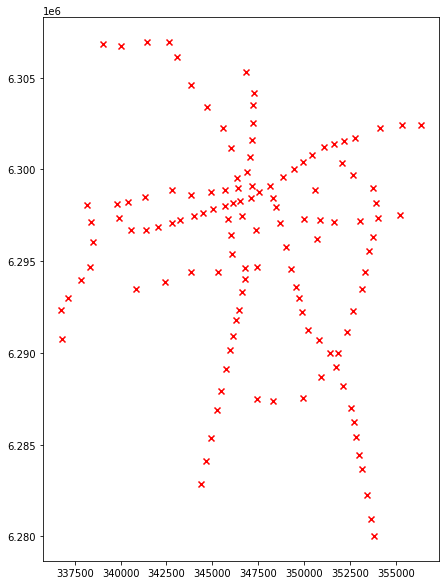

In [39]:
estaciones_metro = gpd.read_file('ejemplos/Metro 2020/Estaciones_2020/Estaciones_2020.shp')
estaciones_metro.plot(figsize = (10,10), marker = 'x', color = 'r')

In [40]:
distritosMetro = gpd.sjoin(distritos, estaciones_metro, op='intersects')

In [41]:
len(distritos)

449

In [42]:
len(distritosMetro)

127

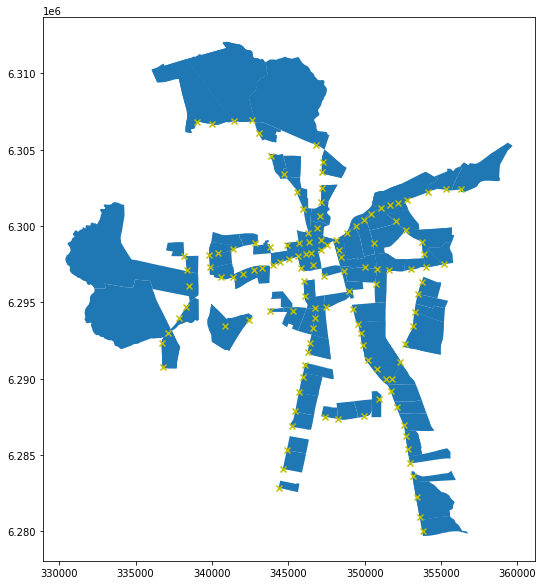

In [44]:
ax = distritosMetro.plot(figsize = (10,10))
estaciones_metro.plot(ax = ax, figsize = (10,10), marker = 'x', color = 'y')